In [78]:
import os
import glob
import re

from collections import namedtuple

import time
from datetime import datetime, timedelta

import matplotlib.pyplot as plt

import numpy as np

import itertools

import time

import cv2

In [79]:
from krwordrank.word import KRWordRank

from wordcloud import WordCloud

import matplotlib.pyplot as plt

In [80]:
log_file_list = glob.glob('../chats/*.log')

In [81]:
print(log_file_list)

['../chats/559066430.log', '../chats/551734269.log', '../chats/562675179.log', '../chats/551240626.log', '../chats/564796691.log', '../chats/552238357.log', '../chats/582902383.log', '../chats/583815634.log']


In [82]:
log_file = log_file_list[-2]

In [83]:
Chat = namedtuple('Chat', 'time id text')

In [84]:
t0 = datetime.strptime('00:00:00','%H:%M:%S')

In [85]:
chat_history = list()

with open(log_file, 'r') as file:
    
    count = 0
    for chat in file:
#     chat = next(file).strip()
#         print(chat.strip())
        chat_time = re.search('\[.*?\]', chat)[0]
        user_id_match = re.search('<.*?>', chat)
        user_id = user_id_match[0]
        start_of_chat = user_id_match.span()[-1]
        text = chat[start_of_chat:].strip()
        
        dt = datetime.strptime(chat_time,'[%H:%M:%S]') - t0
#         print(dt.total_seconds())
        
        chat_tuple = Chat(dt.total_seconds(), user_id[1:-1], text)

#         print('{}'.format(chat_tuple))
        chat_history.append(chat_tuple)
        

In [86]:
chat_time_list = [getattr(chat, 'time') for chat in chat_history]

In [87]:
max_min = np.int(np.ceil(max(chat_time_list)/60) + 1)

In [88]:
def express_bins_as_time_range(bins, index_list):
    
    time_range_list = list()
    
    for index in index_list:
        begin = timedelta(seconds=int(bins[index]))
        end = timedelta(seconds=int(bins[index+1]))
        print('[{} ~ {}]'.format(begin, end))
        time_range_list.append((begin, end))
        
    return time_range_list
    
def express_bins_as_sec_range(bins, index_list):
    
    time_range_list = list()
    
    for index in index_list:
        begin = int(bins[index])
        end = int(bins[index+1])
        time_range_list.append((begin, end))
        
    return time_range_list

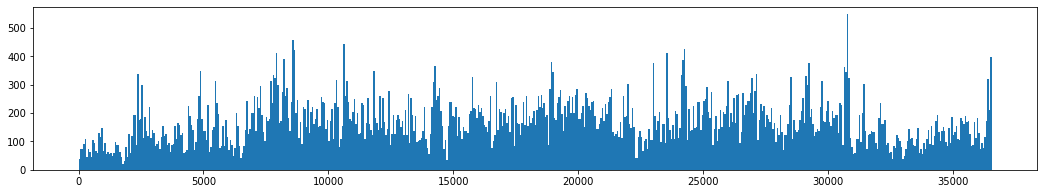

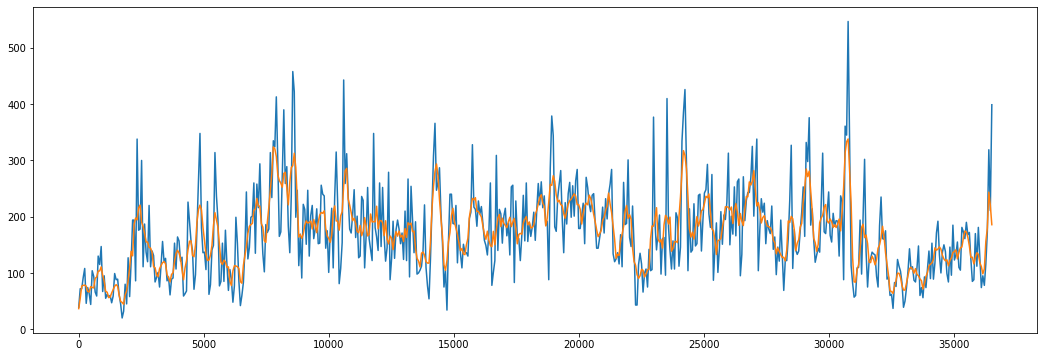

0.37937806873976126
51.20804362456574
[39, 143, 177, 197, 279, 384, 393, 514, 525, 610]
[0:38:58 ~ 0:39:58]
[2:22:41 ~ 2:23:41]
[2:56:36 ~ 2:57:36]
[3:16:33 ~ 3:17:32]
[4:38:19 ~ 4:39:19]
[6:23:02 ~ 6:24:02]
[6:32:01 ~ 6:33:01]
[8:32:41 ~ 8:33:41]
[8:43:39 ~ 8:44:39]
[10:08:26 ~ 10:09:26]


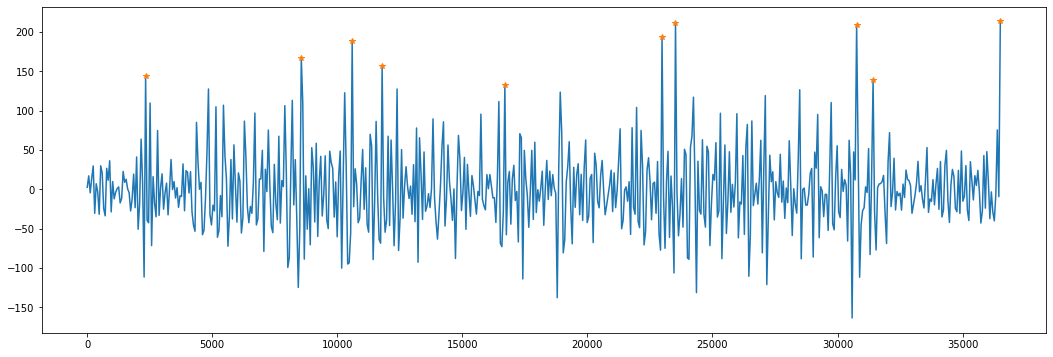

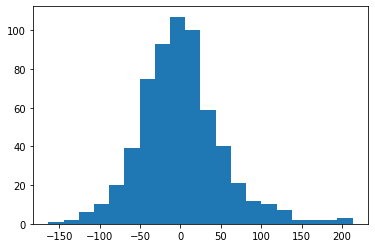

In [89]:
plt.figure(figsize=(18, 3))
histogram, bins, _ = plt.hist(chat_time_list, bins=max_min)
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(bins[:-1], histogram)
historgram_avg = np.convolve(histogram, np.ones(5)/5, 'same')
plt.plot(bins[:-1], historgram_avg)
plt.show()

histogram_delta = histogram - historgram_avg

print(np.mean(histogram_delta))

print(np.std(histogram_delta))

outlier_idx = np.argwhere(histogram_delta > np.mean(histogram_delta) + 2.5 * np.std(histogram_delta))
outlier_idx = list(itertools.chain.from_iterable(outlier_idx))

print(outlier_idx)
express_bins_as_time_range(bins, outlier_idx)

plt.figure(figsize=(18, 6))
plt.plot(bins[:-1], histogram_delta)
plt.plot(bins[:-1][outlier_idx], histogram_delta[outlier_idx], '*')
plt.show()



plt.figure()
_, _, _ = plt.hist(histogram_delta, bins=20)
plt.show()

time_range = express_bins_as_sec_range(bins, outlier_idx)

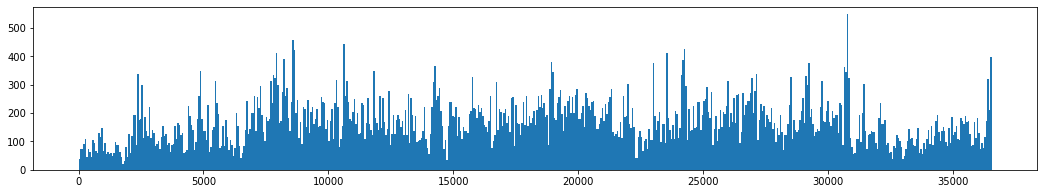

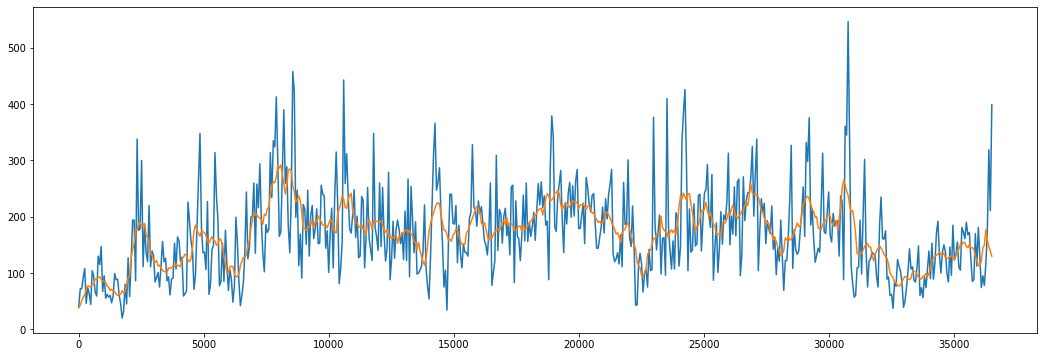

0.7963993453355059
62.012331703226295
[39, 81, 91, 143, 144, 177, 384, 393, 405, 476, 514, 608, 610]
[0:38:58 ~ 0:39:58]
[1:20:51 ~ 1:21:51]
[1:30:50 ~ 1:31:50]
[2:22:41 ~ 2:23:41]
[2:23:41 ~ 2:24:41]
[2:56:36 ~ 2:57:36]
[6:23:02 ~ 6:24:02]
[6:32:01 ~ 6:33:01]
[6:43:59 ~ 6:44:59]
[7:54:47 ~ 7:55:47]
[8:32:41 ~ 8:33:41]
[10:06:26 ~ 10:07:26]
[10:08:26 ~ 10:09:26]


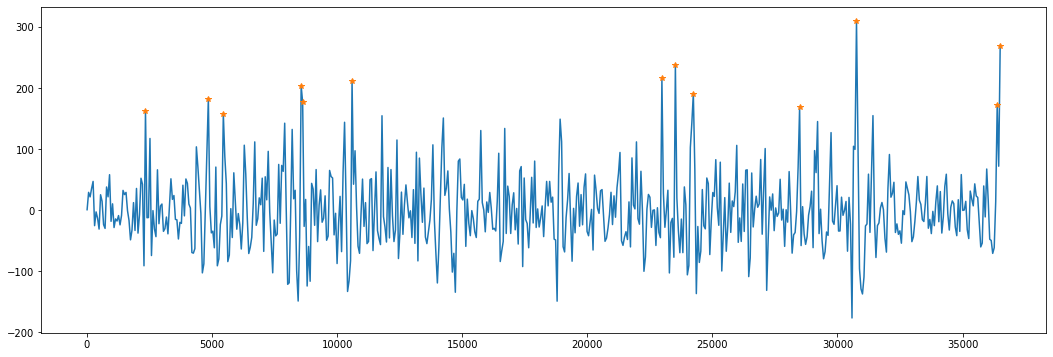

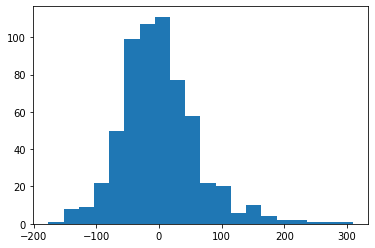

In [90]:
plt.figure(figsize=(18, 3))
histogram, bins, _ = plt.hist(chat_time_list, bins=max_min)
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(bins[:-1], histogram)
historgram_avg = np.convolve(histogram, np.ones(10)/10, 'same')
plt.plot(bins[:-1], historgram_avg)
plt.show()

histogram_delta = histogram - historgram_avg

print(np.mean(histogram_delta))

print(np.std(histogram_delta))

outlier_idx = np.argwhere(histogram_delta > np.mean(histogram_delta) + 2.5 * np.std(histogram_delta))
outlier_idx = list(itertools.chain.from_iterable(outlier_idx))

print(outlier_idx)
express_bins_as_time_range(bins, outlier_idx)

plt.figure(figsize=(18, 6))
plt.plot(bins[:-1], histogram_delta)
plt.plot(bins[:-1][outlier_idx], histogram_delta[outlier_idx], '*')
plt.show()


plt.figure()
_, _, _ = plt.hist(histogram_delta, bins=20)
plt.show()

In [91]:
print(datetime.now().strftime("%H-%M-%S"))

19-39-00


In [92]:
group_index = 0
search_range = time_range[group_index]
chat_group = [list() for i in range(len(time_range))]

for chat in chat_history:
    time = getattr(chat, 'time')
    
    if time >= search_range[0] and time <= search_range[1]:
        chat_group[group_index].append(chat)
    
    if time >= search_range[0] and time >= search_range[1]:
        group_index += 1
        if group_index >= len(time_range):
            break
        else:
            search_range = time_range[group_index]

# for begin, end in time_range:
    

In [93]:
print(time_range)

[(2338, 2398), (8561, 8621), (10596, 10656), (11793, 11852), (16699, 16759), (22982, 23042), (23521, 23581), (30761, 30821), (31419, 31479), (36506, 36566)]


In [94]:
text_group = list()

for chats in chat_group:
    
    text_list = list()
    
    for chat in chats:
        text = getattr(chat, 'text')
        text_list.append(text)
        
    text_group.append(text_list)

In [95]:
# https://lovit.github.io/nlp/2018/04/17/word_cloud/

min_count = 5   # 단어의 최소 출현 빈도수 (그래프 생성 시)
max_length = 10 # 단어의 최대 길이

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

# keywords, rank, graph = wordrank_extractor.extract(text_group[0], beta, max_iter)

# for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
#     print('%8s:\t%.4f' % (word, r))

kimdoeAA:	5.2723
  yeoRIP:	3.3855
   ddolQ:	2.7891
      ??:	2.4641
     택기가:	2.3356
      퍼리:	1.9847
     권위자:	1.4341
      있다:	1.2292
      그쪽:	1.2075
      ㅋㅋ:	1.1168

kimdoeCVM:	4.3477
     ㅗㅜㅑ:	3.3532
      ㅋㅋ:	3.0229
     세계관:	2.5219
      밑에:	1.6454
   최강자들의:	1.5387
      히히:	1.1037
      진짜:	1.0663
      못가:	0.9543
    자강두천:	0.9191

kimdoeIBR:	4.6905
     ㅋㅋㅋ:	2.5799
      천재:	2.2598
     게임의:	1.4818
     ㅗㅜㅑ:	1.2038
      ??:	0.9623
      역시:	0.8574
      ㄹㅇ:	0.7436
      방송:	0.6313
      스폰:	0.4875

뒤로가면되지않을까?:	5.9047
kimdoeCVM:	4.5935
     게이밍:	2.8502
     ㅋㅋㅋ:	2.3247
      슈트:	2.1303
      on:	1.8397
     고양이:	1.6908
      아니:	1.5973
      ON:	1.0944
      ㅗㅜ:	1.0780

lucia9Reo:	5.4008
kimdoeKB:	4.8174
jadongH2:	4.3923
      호야:	4.1294
      ㅠㅠ:	1.9056
     ㅋㅋㅋ:	1.9036
     빻냥이:	1.6737
     귀여움:	1.4089
      구글:	1.0056
      빻야:	0.6396

kimdoeGT:	6.9108
revaBB03:	4.5783
      ㅋㅋ:	2.9496
      졸업:	1.6290
     과몰입:	1.2797
      안죽:	0.5804
      ㄹㅇ:	0.4013
      잘가:	0.3730
   

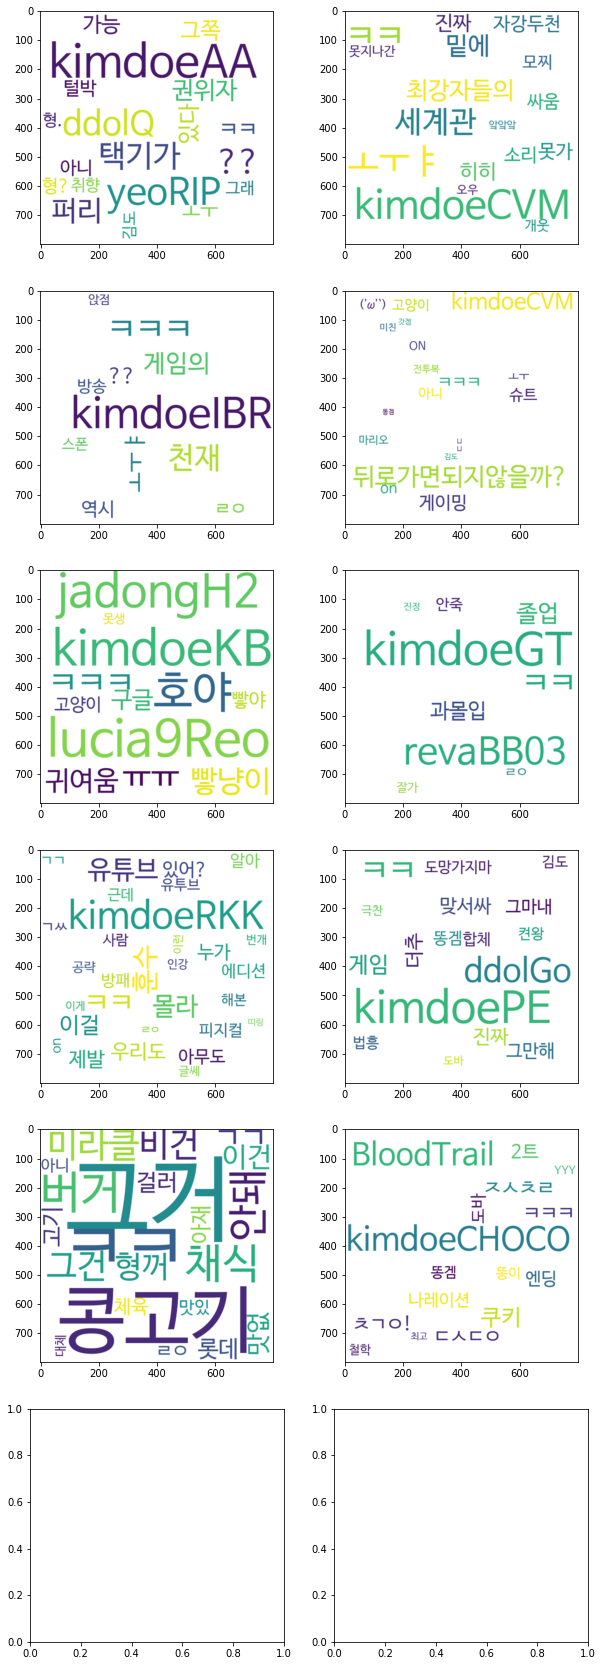

In [96]:
font_path = '/Library/Fonts/NanumBarunGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

fig, axes = plt.subplots(int(len(text_group) // 2 + 1), 2, figsize=(10, int(len(text_group) // 2 + 1) * 5))

axes = axes.flatten()

for i, texts in enumerate(text_group):
    
    wordrank_extractor = KRWordRank(min_count=min_count, max_length=max_length)

    keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

    for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:10]:
        print('%8s:\t%.4f' % (word, r))
    print()

    wordcloud = wordcloud.generate_from_frequencies(keywords)

    array = wordcloud.to_array()
    # print(type(array)) # numpy.ndarray
    # print(array.shape) # (800, 800, 3)

    axes[i].imshow(array, interpolation="bilinear")
    
plt.show()

In [97]:
video_file_name = mp4_files[0]

In [98]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

for i, (start, end) in enumerate(time_range):
    suffix = '_{:02d}.mp4'.format(i)
    clip_file_name = video_file_name.replace('.mp4', suffix)
    pre_offset = 10
    ffmpeg_extract_subclip(video_file_name, start - pre_offset, end, targetname=clip_file_name)

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [22]:
mp4_files = sorted(glob.glob('../videos/*.mp4'))

In [24]:
# https://www.learnopencv.com/read-write-and-display-a-video-using-opencv-cpp-python/

# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture(mp4_files[0])


In [1]:
# https://www.learnopencv.com/read-write-and-display-a-video-using-opencv-cpp-python/

import cv2

# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture(mp4_files[0])

# Check if camera opened successfully
if (cap.isOpened()== False): 
    print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if ret == True:
        cv2.imshow('Frame',frame)
#         time.sleep(0.01)
        
        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    else: 
        break

cap.release()

# Closes all the frames
cv2.destroyAllWindows()


NameError: name 'mp4_files' is not defined